In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob
import seaborn as sns

In [4]:
#Creating the Training dataframe
path = r'/home/harindu/Assignment_II/accel_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [5]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']
activityDF = activityDF.drop(['index'], axis=1)
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)
activityDF['activity'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
Name: activity, dtype: int64

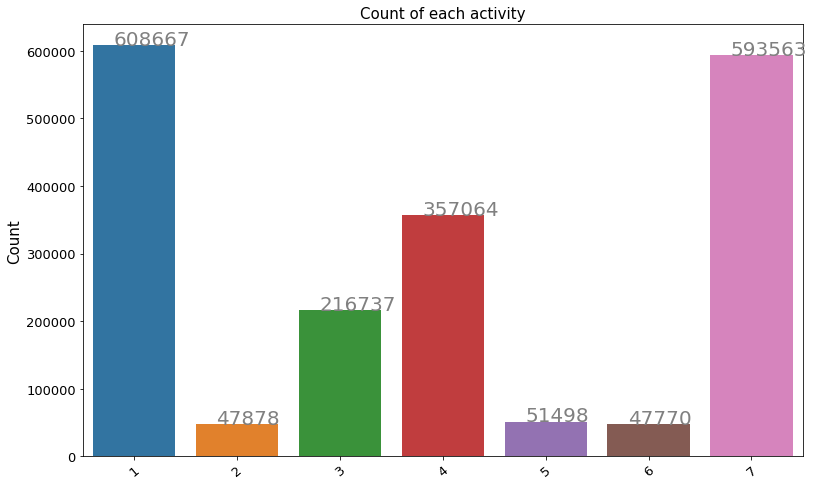

In [6]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [7]:
activityDF = activityDF.sample(frac=1).reset_index(drop=True)

In [8]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separate input features and target
y = activityDF.activity
X = activityDF.drop('activity', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate classes
A1 = X[X.activity==1]
A2 = X[X.activity==2]
A3 = X[X.activity==3]
A4 = X[X.activity==4]
A5 = X[X.activity==5]
A6 = X[X.activity==6]
A7 = X[X.activity==7]

In [9]:
# downsample majority
A1_downsampled = resample(A1, replace = False, # sample without replacement
                                n_samples = len(A5), # match minority n
                                random_state = 27) # reproducible results

A3_downsampled = resample(A3, replace = False, # sample without replacement
                                n_samples = len(A5), # match minority n
                                random_state = 27) # reproducible results

A4_downsampled = resample(A4, replace = False, # sample without replacement
                                n_samples = len(A5), # match minority n
                                random_state = 27) # reproducible results

A7_downsampled = resample(A7, replace = False, # sample without replacement
                                n_samples = len(A5), # match minority n
                                random_state = 27) # reproducible results


In [10]:
# combine minority and downsampled majority
downsampled = pd.concat([A1_downsampled, A2, A3_downsampled, A4_downsampled, A5, A6, A7_downsampled])

# checking counts
downsampled.activity.value_counts()

7    38609
5    38609
4    38609
3    38609
1    38609
2    35995
6    35797
Name: activity, dtype: int64

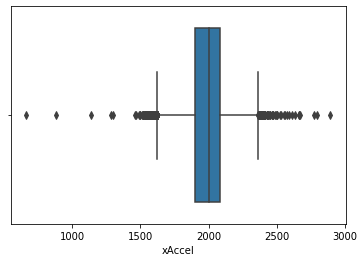

In [11]:
sns.boxplot(x=downsampled['xAccel'])

In [12]:
Q1 = downsampled.quantile(0.25)
Q3 = downsampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

xAccel      185.0
yAccel      101.0
zAccel      115.0
activity      4.0
dtype: float64


In [13]:
activityDF_out = downsampled[~((downsampled < (Q1 - 1.5 * IQR)) |(downsampled > (Q3 + 1.5 * IQR))).any(axis=1)]
activityDF_out.shape

(251904, 4)

In [14]:
activityDF_out

,xAccel,yAccel,zAccel,activity
730522,1940,2341,2109,1
1743513,2239,2229,1773,1
555781,1892,2365,2135,1
889289,1973,2279,1754,1
464483,2163,2291,1796,1
...,...,...,...,...
468502,2065,2541,2049,7
205120,2100,2317,1961,7
347808,1783,2257,1863,7
1749105,2051,2407,1919,7


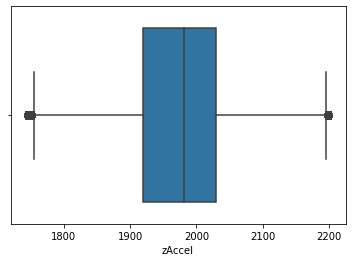

In [15]:
sns.boxplot(x=activityDF_out['zAccel'])

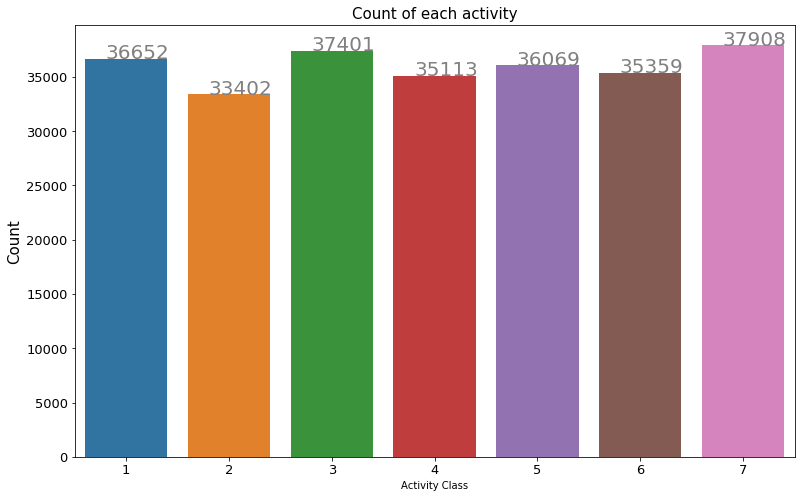

In [16]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF_out)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Activity Class")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.show()

In [17]:
activityDF_out.describe()

,xAccel,yAccel,zAccel,activity
count,251904.000000,251904.000000,251904.000000,251904.000000
mean,1992.699020,2380.009964,1971.441954,4.025208
std,114.285583,84.464709,84.683313,2.011659
min,1625.000000,2175.000000,1743.000000,1.000000
25%,1901.000000,2330.000000,1920.000000,2.000000
50%,2006.000000,2362.000000,1982.000000,4.000000
75%,2087.000000,2417.000000,2030.000000,6.000000
max,2362.000000,2578.000000,2202.000000,7.000000


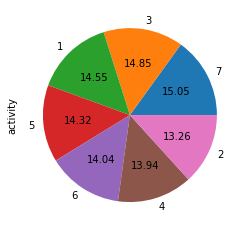

In [18]:
#Gender distribution in the dataset

activityDF_out['activity'].value_counts().plot(kind='pie',autopct='%.2f')

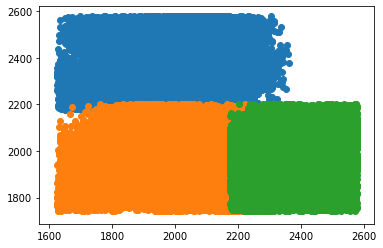

In [19]:
plt.scatter(activityDF_out['xAccel'],activityDF_out['yAccel'])
plt.scatter(activityDF_out['xAccel'],activityDF_out['zAccel'])
plt.scatter(activityDF_out['yAccel'],activityDF_out['zAccel'])
plt.show()

AttributeError: 'Annotation' object has no property 'height'

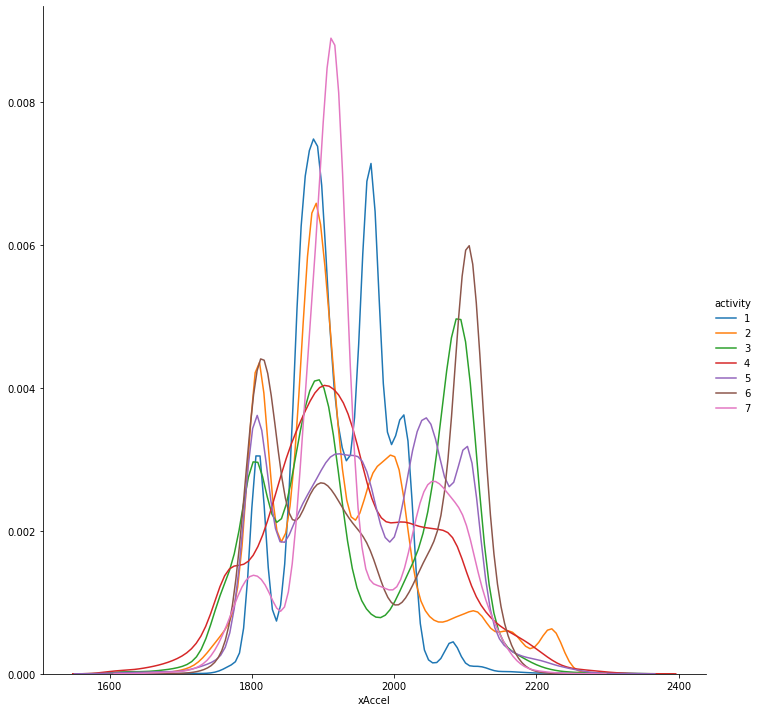

In [56]:
facetgrid = sns.FacetGrid(data = activityDF_out, hue = "activity", height = 10)
facetgrid.map(sns.distplot, "xAccel", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(1, 100),
            arrowprops=dict(facecolor='orange', width = 15, headlength = 15), height = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', 
            arrowprops=dict(facecolor='orange', width = 15, headlength = 13), height = 15, color = "#232b2b")
plt.show()

In [20]:
activityDFMod = activityDF_out.copy()
activityDFMod['averageXYZ'] = activityDFMod[['xAccel','yAccel','zAccel']].mean(axis=1)
activityDFMod

,xAccel,yAccel,zAccel,activity,averageXYZ
730522,1940,2341,2109,1,2130.000000
1743513,2239,2229,1773,1,2080.333333
555781,1892,2365,2135,1,2130.666667
889289,1973,2279,1754,1,2002.000000
464483,2163,2291,1796,1,2083.333333
...,...,...,...,...,...
468502,2065,2541,2049,7,2218.333333
205120,2100,2317,1961,7,2126.000000
347808,1783,2257,1863,7,1967.666667
1749105,2051,2407,1919,7,2125.666667


AttributeError: 'Annotation' object has no property 'height'

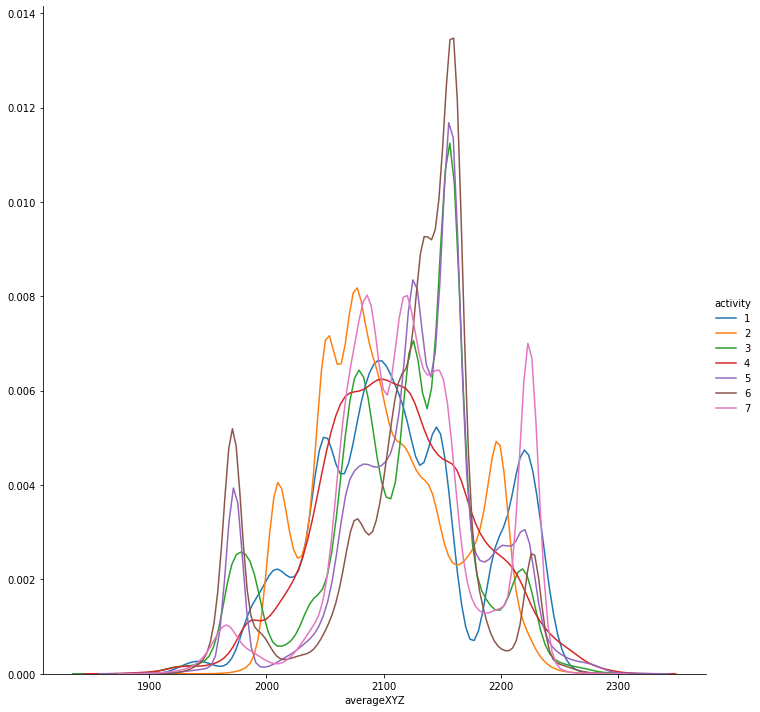

In [22]:
facetgrid = sns.FacetGrid(data = activityDFMod, hue = "activity", height = 10)
facetgrid.map(sns.distplot, "averageXYZ", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(1, 100),
            arrowprops=dict(facecolor='orange', width = 15, headlength = 15), height=15,color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', 
            arrowprops=dict(facecolor='orange', width = 15, headlength = 13),  height=15,color = "#232b2b")
plt.show()